# Initial Movie Data Exploration 


Overview 

This project assess and analyze imporant indicators for the establishment of a successful Microsoft movie studio based on retrospective data derived from multiple sources. 





Business problem 

Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they dont know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office. 
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


To anser major questions 

1- Profit- Revenue
2- Entertainment- Ratings
3- consistency/ top in the movie industry- movie type




Data Understanding

MDb is an online database of information related to movies. This databse contains detail information about a movie including the title ratings and basics. Data realted to revenue from each movie was generated uing the Boxofficie Mojo dataset.
For the creation of a successful movie studio by Microsoft, the follwing data results will be considered for business recommendations

1. What type of movies/genres/ have the highest ratigs?
varaibles: generes, ratings
method: bar cahrt 
  
2. What tye of movies have the highest doestic  gross revenue?
 
 sort movies by ascending doesmtic revenue.
 
 variables:genres,domestic revenue
        
    
3. Does runtime in minutes affect the movie rating?
    corelation: rating- runtime 
    method used: scatter plot 
    
    Mergig tables to biring the column
     -Studio
     -Movie types/genres
     -Average ratings
     -Domestic revenue
     -runtime in minutes
     -year
     










In [92]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
!ls zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [94]:
bom=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [95]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [96]:
bom['title_year'] = bom['title'] + " " + bom['year'].astype(str)

In [97]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
 5   title_year      3387 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 158.9+ KB


In [98]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year,title_year
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010) 2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1 2010
3,Inception,WB,292600000.0,535700000,2010,Inception 2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010


In [99]:
tit_basics= pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [100]:
tit_basics.rename(columns={"primary_title":"title"} , inplace=True)

In [101]:
tit_basics.head()

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [102]:

tit_basics['title_year']= tit_basics['title'] + " " + tit_basics['start_year'].astype(str)

In [103]:
tit_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   title_year       146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


In [104]:
tit_basics.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017


In [105]:
Movie_Data=pd.merge(bom,tit_basics, on=['title_year', 'title'])


In [106]:
Movie_Data.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,tconst,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,Inception 2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After 2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse 2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2 2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"


In [107]:
Movie_Data.drop(columns='foreign_gross', inplace=True)

In [108]:
Movie_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 1872
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1873 non-null   object 
 1   studio           1871 non-null   object 
 2   domestic_gross   1863 non-null   float64
 3   year             1873 non-null   int64  
 4   title_year       1873 non-null   object 
 5   tconst           1873 non-null   object 
 6   original_title   1873 non-null   object 
 7   start_year       1873 non-null   int64  
 8   runtime_minutes  1863 non-null   float64
 9   genres           1871 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 161.0+ KB


In [109]:
tit_ratings= pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [110]:
tit_ratings.head(200)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
195,tt1665807,7.2,6
196,tt1667417,3.7,484
197,tt1668191,7.5,27146
198,tt1671494,5.6,136


In [111]:
tit_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [112]:
#name Movie_Analysys to indicate the merge of Movie_Data adn tit_ratings 
Movie_Analysis=pd.merge(Movie_Data,tit_ratings, on='tconst')

In [113]:
Movie_Analysis.head()

,title,studio,domestic_gross,year,title_year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,Inception 2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,Shrek Forever After 2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,The Twilight Saga: Eclipse 2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,Iron Man 2 2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [114]:
Movie_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 1846
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1847 non-null   object 
 1   studio           1845 non-null   object 
 2   domestic_gross   1837 non-null   float64
 3   year             1847 non-null   int64  
 4   title_year       1847 non-null   object 
 5   tconst           1847 non-null   object 
 6   original_title   1847 non-null   object 
 7   start_year       1847 non-null   int64  
 8   runtime_minutes  1843 non-null   float64
 9   genres           1845 non-null   object 
 10  averagerating    1847 non-null   float64
 11  numvotes         1847 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 187.6+ KB


In [115]:
Movie_Analysis.head()

,title,studio,domestic_gross,year,title_year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,Inception 2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,Shrek Forever After 2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,The Twilight Saga: Eclipse 2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,Iron Man 2 2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [116]:
Movie_Analysis.dropna(how= 'all', inplace= True)

In [117]:
Movie_Analysis.head()

,title,studio,domestic_gross,year,title_year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,2010,Inception 2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,2010,Shrek Forever After 2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,The Twilight Saga: Eclipse 2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,2010,Iron Man 2 2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


<AxesSubplot:ylabel='Frequency'>

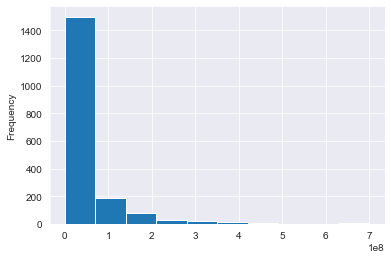

In [118]:
#Draw histogram to show the columna name doemstic_gross
Movie_Analysis['domestic_gross'].plot.hist()

2. 

In [119]:
Movie_Analysis['genres']

0       Adventure,Animation,Comedy
1          Action,Adventure,Sci-Fi
2       Adventure,Animation,Comedy
3          Adventure,Drama,Fantasy
4          Action,Adventure,Sci-Fi
                   ...            
1842                         Drama
1843                  Comedy,Drama
1844                         Drama
1845         Action,Drama,Thriller
1846                        Comedy
Name: genres, Length: 1847, dtype: object

In [123]:
Movie_Analysis['genres'].str.split(",").explode()

0       Adventure
0       Animation
0          Comedy
1          Action
1       Adventure
          ...    
1844        Drama
1845       Action
1845        Drama
1845     Thriller
1846       Comedy
Name: genres, Length: 4569, dtype: object

In [124]:
Movie_Analysis['genres']=Movie_Analysis['genres'].str.split(",")

In [125]:
Movie_Analysis['genres']

0       [Adventure, Animation, Comedy]
1          [Action, Adventure, Sci-Fi]
2       [Adventure, Animation, Comedy]
3          [Adventure, Drama, Fantasy]
4          [Action, Adventure, Sci-Fi]
                     ...              
1842                           [Drama]
1843                   [Comedy, Drama]
1844                           [Drama]
1845         [Action, Drama, Thriller]
1846                          [Comedy]
Name: genres, Length: 1847, dtype: object

In [172]:
Movie_exploded=Movie_Analysis.explode('genres')

In [173]:
Movie_exploded

,title,studio,domestic_gross,year,title_year,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,Adventure,8.3,682218
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,Animation,8.3,682218
0,Toy Story 3,BV,415000000.0,2010,Toy Story 3 2010,tt0435761,Toy Story 3,2010,103.0,Comedy,8.3,682218
1,Inception,WB,292600000.0,2010,Inception 2010,tt1375666,Inception,2010,148.0,Action,8.8,1841066
1,Inception,WB,292600000.0,2010,Inception 2010,tt1375666,Inception,2010,148.0,Adventure,8.8,1841066
...,...,...,...,...,...,...,...,...,...,...,...,...
1844,A Paris Education,KL,21600.0,2018,A Paris Education 2018,tt6593240,Mes provinciales,2018,137.0,Drama,6.3,371
1845,The Quake,Magn.,6200.0,2018,The Quake 2018,tt6523720,Skjelvet,2018,106.0,Action,6.2,5270
1845,The Quake,Magn.,6200.0,2018,The Quake 2018,tt6523720,Skjelvet,2018,106.0,Drama,6.2,5270
1845,The Quake,Magn.,6200.0,2018,The Quake 2018,tt6523720,Skjelvet,2018,106.0,Thriller,6.2,5270


In [190]:
#group by the column genres with the mean function

Movie_Genresdetail=Movie_exploded.groupby('genres').mean().reset_index()

In [196]:
Movie_Genresdetail.sort_values(by='domestic_gross', ascending= True, inplace=True)

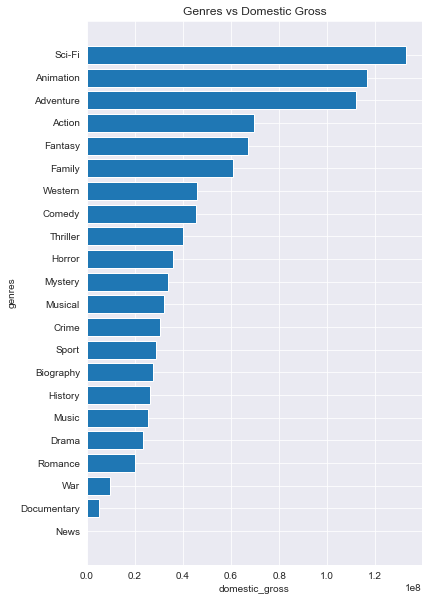

In [209]:
fig,ax=plt.subplots()
fig.set_figheight(10)
ax.set_ylabel('genres')
ax.set_xlabel('domestic_gross')
#ax.set_xticklabels(labels=Movie_Genresdetail['genres'], rotation = 45,ha='right')

ax.barh(y=Movie_Genresdetail['genres'], width=Movie_Genresdetail['domestic_gross'])

ax.set_title('Genres vs Domestic Gross')

plt.savefig("./images.jpg")

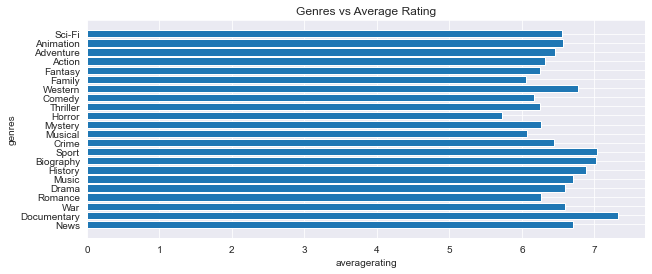

In [214]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
ax.set_ylabel('genres')
ax.set_xlabel('averagerating')
#ax.set_xticklabels(labels=Movie_Genresdetail['genres'], rotation = 45,ha='right')

ax.barh(y=Movie_Genresdetail['genres'], width=Movie_Genresdetail['averagerating'])

ax.set_title('Genres vs Average Rating')

plt.savefig("./images.jpg")

<AxesSubplot:ylabel='Frequency'>

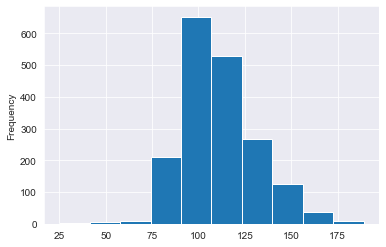

In [160]:
Movie_exploded['runtime_minutes'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

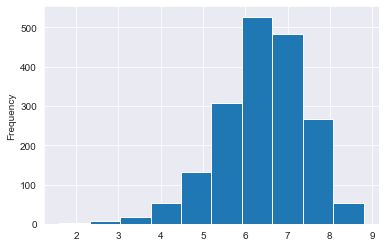

In [164]:
Movie_exploded['averagerating'].plot.hist()

What type of movies/genres/ have the highest ratigs? varaibles: generes, ratings method: bar cahrt
        
        

3. Does runtime in minutes affect the movie rating?
    corelation: rating- runtime 
    method used: scatter plot 

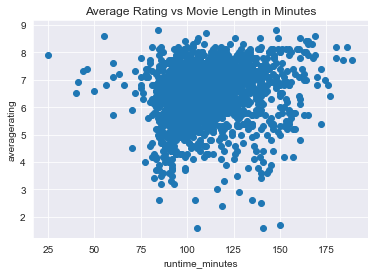

In [189]:
x=Movie_Analysis['runtime_minutes']
y=Movie_Analysis['averagerating']
fig, ax=plt.subplots()
ax.scatter(x=x , y=y)
ax.set_ylabel('averagerating')
ax.set_xlabel('runtime_minutes')
ax.set_title('Average Rating vs Movie Length in Minutes')

plt.savefig("./images.jpg")